In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots
using GLM
using Statistics
using Distributions
using Random
using MultivariateStats

In [2]:
autoData = CSV.File("dataset/Auto.csv"; missingstring="?") |> DataFrame;

In [22]:
function getMSEOfValidation(train, validation)
    ols_1 = lm(@formula(mpg ~  horsepower), train);
    ols_2 = lm(@formula(mpg ~  horsepower + horsepower^2), train);
    ols_3 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3), train);
    ols_4 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4), train);
    ols_5 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5), train);
    ols_6 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5 + horsepower^6), train);
    ols_7 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5 + horsepower^6 + horsepower^7), train);
    ols_8 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5 + horsepower^6 + horsepower^7 + horsepower^8), train);
    ols_9 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5 + horsepower^6 + horsepower^7 + horsepower^8 + horsepower^9), train);
    ols_10 = lm(@formula(mpg ~  horsepower + horsepower^2 + horsepower^3 + horsepower^4 + horsepower^5 + horsepower^6 + horsepower^7 + horsepower^8 + horsepower^9 + horsepower^10), train);

    all_models = [ols_1, ols_2, ols_3, ols_4, ols_5, ols_6, ols_7, ols_8, ols_9, ols_10];
    result = []
    for model in all_models
        p = predict(model, validation)
        mse = sum((validation[:mpg] - p).^2) / length(p)
        push!(result, mse)
    end
    return result
end

getMSEOfValidation (generic function with 1 method)

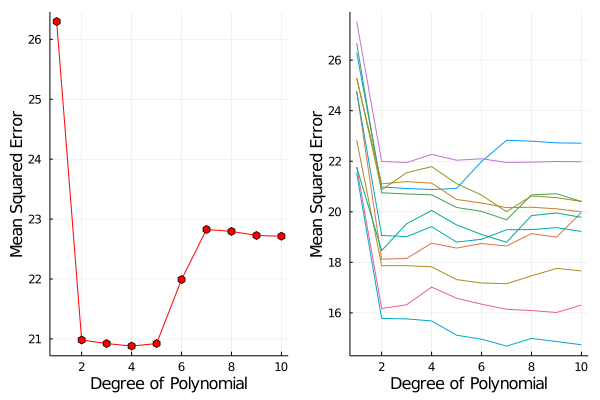

In [28]:
# Figure 5.2
clean_autoData = dropmissing(autoData, :horsepower)

indices = collect(1: nrow(clean_autoData))
shuffle!(indices)

train = clean_autoData[indices[1:196], :]
validation = clean_autoData[indices[197:end], :]

mse = getMSEOfValidation(train, validation)
p1 = plot(mse, xlabel="Degree of Polynomial", ylabel="Mean Squared Error", legend=false, markershape = :hexagon, lc="red", markercolor = :red)

p2 = plot(mse)
for i=1:10
    shuffle!(indices)
    train = clean_autoData[indices[1:196], :]
    validation = clean_autoData[indices[197:end], :]
    mse = getMSEOfValidation(train, validation)

    p2 = plot!(mse, xlabel="Degree of Polynomial", ylabel="Mean Squared Error", legend=false)
end

plot(p1, p2)

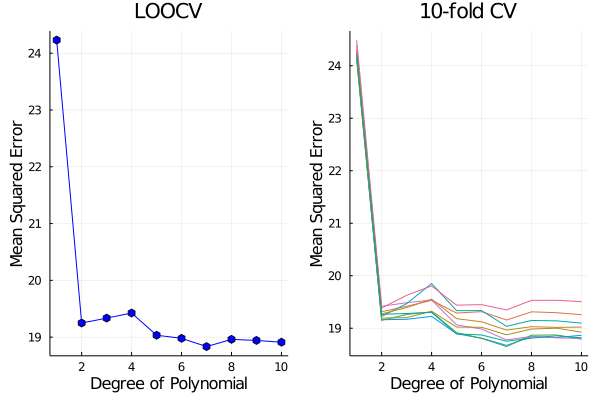

In [57]:
# Figure 5.4
mse = zeros(10)
for i in 1:nrow(clean_autoData)
    indices = collect(1:nrow(clean_autoData))
    popat!(indices, i)
    train = clean_autoData[indices, :]
    validation = clean_autoData[[i], :]
    mse = mse + getMSEOfValidation(train, validation)
end

mse = mse / nrow(clean_autoData)
p1 = plot(mse, xlabel="Degree of Polynomial", ylabel="Mean Squared Error", legend=false, markershape = :hexagon, lc="blue", markercolor = :blue, title="LOOCV")

############################
indices = collect(1:nrow(clean_autoData))
batch = nrow(clean_autoData) ÷ 10
n = nrow(clean_autoData)

mse_k = zeros(10, 9)
for i in 1:9
    shuffle!(indices)
    for k in 1:10
        sInd = (k - 1) * batch + 1
        eInd = k * batch
        if k == 10
            eInd = n
        end
        validation = clean_autoData[indices[sInd:eInd], :]
        rest = collect(1:n)
        splice!(rest, collect(sInd:eInd))
        train = clean_autoData[indices[rest], :]
        mse_k[:, i] += getMSEOfValidation(train, validation)
    end
end
mse_k = mse_k ./ 10
p2 = plot(mse_k, xlabel="Degree of Polynomial", ylabel="Mean Squared Error", legend=false, title="10-fold CV")

plot(p1, p2)